In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline 

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91694a80b8>,
      dtype=object)

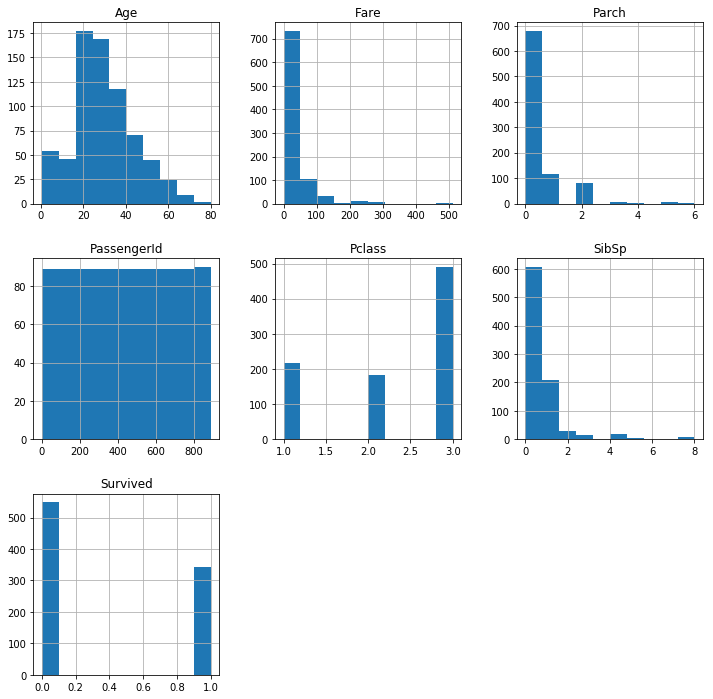

In [9]:
df.hist(figsize = (12,12))

In [10]:
plt.figure(figsize = (15,15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

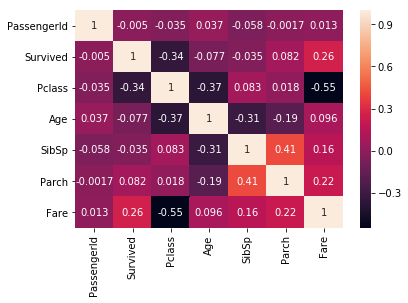

In [11]:
sns.heatmap(df.corr(),annot = True)

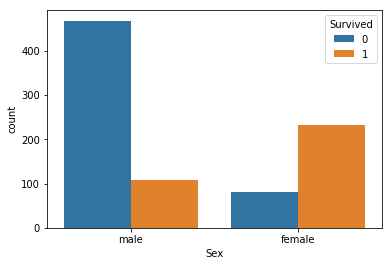

In [12]:
sns.countplot('Sex' , hue = 'Survived',data = df)

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
from sklearn.model_selection import  train_test_split

In [15]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

In [16]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S': 0 , 'C':1 , 'Q':2}).astype(int)

In [17]:
df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis =1)

In [18]:
train_X = df.drop('Survived',axis = 1)
train_y = df.Survived
(train_X , test_X , train_y , test_y) = train_test_split(train_X, train_y , test_size = 0.3 , random_state = 0)

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0)

In [20]:
clf = clf.fit(train_X , train_y)

In [21]:
pred = clf.predict(test_X)

In [22]:
from sklearn.metrics import (roc_curve , auc ,accuracy_score)

In [23]:
pred = clf.predict(test_X)

In [24]:
fpr, tpr, thresholds = roc_curve(test_y , pred,pos_label = 1)

In [25]:
auc(fpr,tpr)

0.7657142857142857

In [26]:
accuracy_score(pred,test_y)

0.7798507462686567

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf = RandomForestClassifier(n_estimators = 10,max_depth=5,random_state = 0)

In [29]:
clf = clf.fit(train_X , train_y)

In [30]:
pred = clf.predict(test_X)

In [31]:
fpr, tpr , thresholds = roc_curve(test_y,pred,pos_label = 1)

In [32]:
auc(fpr,tpr)

0.7963095238095238

In [33]:
accuracy_score(pred,test_y)

0.8283582089552238

In [34]:
fin = pd.read_csv('test.csv')

In [35]:
fin.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
passsengerid = fin['PassengerId']

In [37]:
fin.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
fin['Fare'] = fin['Fare'].fillna(fin['Fare'].median())

In [39]:
fin['Age'] = fin['Age'].fillna(fin['Age'].median())

In [40]:
fin['Embarked'] = fin['Embarked'].fillna('S')

In [41]:
fin['Sex'] = fin['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [42]:
fin['Embarked'] = fin['Embarked'].map( {'S': 0 , 'C':1 , 'Q':2}).astype(int)

In [43]:
fin= fin.drop(['Cabin','Name','Ticket','PassengerId'],axis =1)

In [44]:
predictions = clf.predict(fin)

In [45]:
submission = pd.DataFrame({'PassengerId':passsengerid, 'Survived':predictions})

In [46]:
submission.to_csv('submission.csv' , index = False)

In [47]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
